In [1]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
                        1.0,2.0,3.0,4.0
                        5.0,6.0,,8.0
                        10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
df.dropna()
df.dropna(how='all')
df.dropna(axis=1)
df.dropna(thresh=4)
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [4]:
from sklearn.impute import SimpleImputer
import numpy as np

# 欠損値補完のインスタンスを生成（平均値補完）
imr = SimpleImputer(missing_values=np.nan, strategy='mean')

# データを適合
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [5]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
import pandas as pd

df = pd.DataFrame([
        ['green', 'M', 10.1, 'class2'],
        ['red', 'L', 13.5, 'class1'],
        ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [7]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [8]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)


0     M
1     L
2    XL
Name: size, dtype: object

In [9]:
import numpy as np
class_mapping = {label : idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [10]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [11]:
inv_class_mapping = {v : k for k , v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [12]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()

y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [13]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [14]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[: , 0] = color_le.fit_transform(X[: , 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [15]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values

# Generation of one-hot encoder
color_ohe = OneHotEncoder()

# Execute one-hot encoding
color_ohe.fit_transform(X[: , 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [16]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values

c_transf = ColumnTransformer([('onehot', OneHotEncoder(), [0]),
                                                         ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [17]:
c_transf_2 = ColumnTransformer([('onehot', OneHotEncoder(), [1]), ('nothing', 'passthrough', [0, 2])])
c_transf_2.fit_transform(X)

array([[1.0, 0.0, 0.0, 'green', 10.1],
       [0.0, 1.0, 0.0, 'red', 13.5],
       [0.0, 0.0, 1.0, 'blue', 15.3]], dtype=object)

In [18]:
pd.get_dummies(df[['price', 'color', 'size']])#, drop_first=True)

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [19]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [20]:
# one-hot encoder の生成
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([('onehot', color_ohe, [0]), ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [21]:
import pandas as pd
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                                    ['red', 'L', 13.5, 'class1'],
                                    ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [22]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L']  = df['size'].apply(lambda x: 1 if x == 'XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


In [23]:
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                                   'Magnesium', 'Total phenols', 'Flavonoids', 'Nonflavonoid phenols', 
                                   'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print('Class labels: ', np.unique(df_wine['Class label']))
df_wine.head()

Class labels:  [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[: , 1:].values, df_wine.iloc[: , 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [25]:
df_wine.iloc[: , 1:]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [26]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [27]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardized: ', (ex - ex.mean()) / ex.std())

print('normalized: ', (ex - ex.min()) / (ex.max() - ex.min()))

standardized:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized:  [0.  0.2 0.4 0.6 0.8 1. ]


In [28]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

np.random.seed(0)
x = np.random.normal(loc=1, scale=1, size=500)
x1 = np.append(x, [20] * 10)
x2 = np.append(x, [20] * 20)

scaler = MinMaxScaler()
x1_scaled_by_minmax = scaler.fit_transform(x1.reshape(-1, 1))
x2_scaled_by_minmax = scaler.fit_transform(x2.reshape(-1, 1))


(array([  0.,   9.,  29.,  83., 139., 127.,  71.,  34.,   8.,   0.]),
 array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <BarContainer object of 10 artists>)

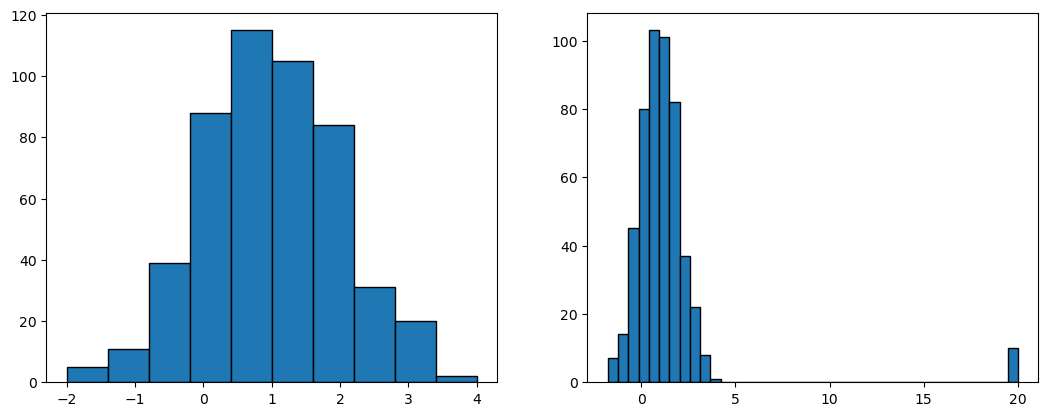

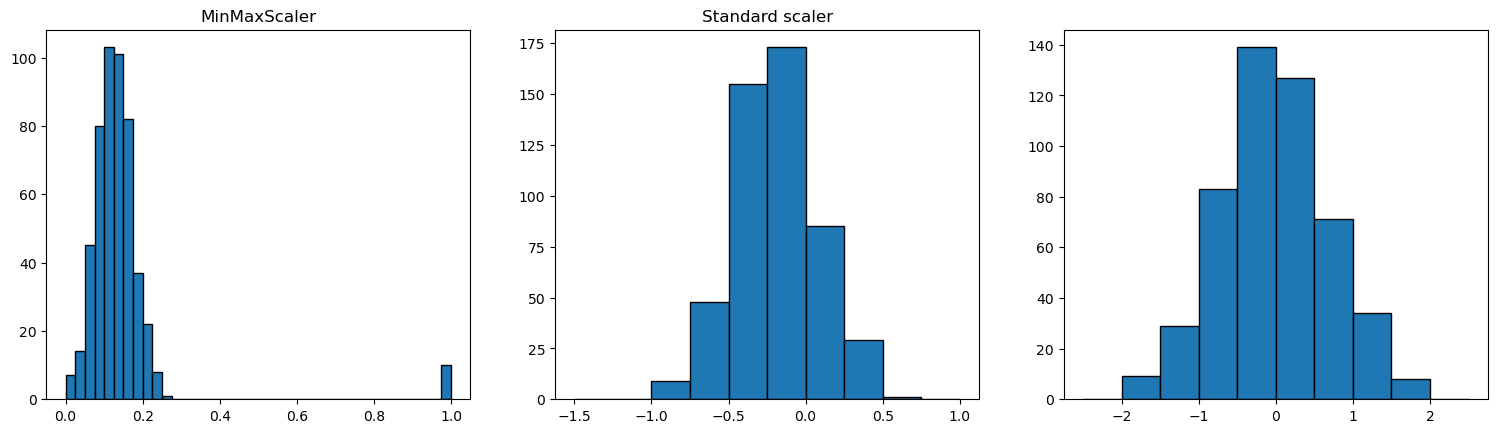

In [29]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler

np.random.seed(0) 
x = np.random.normal(loc=1, scale=1, size=500) 
x1 = np.append(x, [20] * 10) 
x2 = np.append(x, [20] * 20)

scaler = MinMaxScaler() 
x1_scaled_by_minmax = scaler.fit_transform(x1.reshape(-1, 1)) 
x2_scaled_by_minmax = scaler.fit_transform(x2.reshape(-1, 1))

scaler = StandardScaler()
x1_scaled_by_standard = scaler.fit_transform(x1.reshape(-1, 1))
x2_scaled_by_standard = scaler.fit_transform(x2.reshape(-1, 1))

scaler = RobustScaler()
x1_scaled_by_robust = scaler.fit_transform(x1.reshape(-1, 1))
x2_scaled_by_robust = scaler.fit_transform(x2.reshape(-1, 1))

fig0, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].hist(x1, ec='k', bins=10, range=(-2, 4))
axes[1].hist(x1, ec='k', bins=40)

fig1, axes = plt.subplots(1, 3, figsize=(18.6, 4.8))

ax = axes[0]
ax.hist(x1_scaled_by_minmax, ec='k', bins=40)
ax.set_title("MinMaxScaler")

ax = axes[1]
ax.hist(x2_scaled_by_standard, ec='k', bins=10, range=(-1.5, 1))
ax.set_title('Standard scaler')

ax = axes[2]
ax.hist(x2_scaled_by_robust, ec='k', bins=10, range=(-2.5, 2.5))

In [30]:
from sklearn.linear_model import LogisticRegression

# Create an instance of L1 normalized logistic regression
LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [31]:
# 逆正則化パラメータC＝1.0　はデフォルト値であり、
# 値を大きくしたり小さくしたりすると、正則化の効果を強めたり弱めたりできる

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')

lr.fit(X_train_std, y_train)

print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))
lr.intercept_

Training accuracy:  1.0
Test accuracy:  1.0


array([-1.26364356, -1.2159845 , -2.37051997])

In [32]:
lr.coef_

array([[ 1.24607847,  0.17999027,  0.74702643, -1.16433231,  0.        ,
         0.        ,  1.15615087,  0.        ,  0.        ,  0.        ,
         0.        ,  0.560134  ,  2.50890252],
       [-1.53733537, -0.38752109, -0.99512553,  0.36494076, -0.05973125,
         0.        ,  0.66819332,  0.        ,  0.        , -1.93412809,
         1.23381051,  0.        , -2.23173656],
       [ 0.13577931,  0.1682818 ,  0.35716535,  0.        ,  0.        ,
         0.        , -2.43819226,  0.        ,  0.        ,  1.56358765,
        -0.81904328, -0.49226812,  0.        ]])

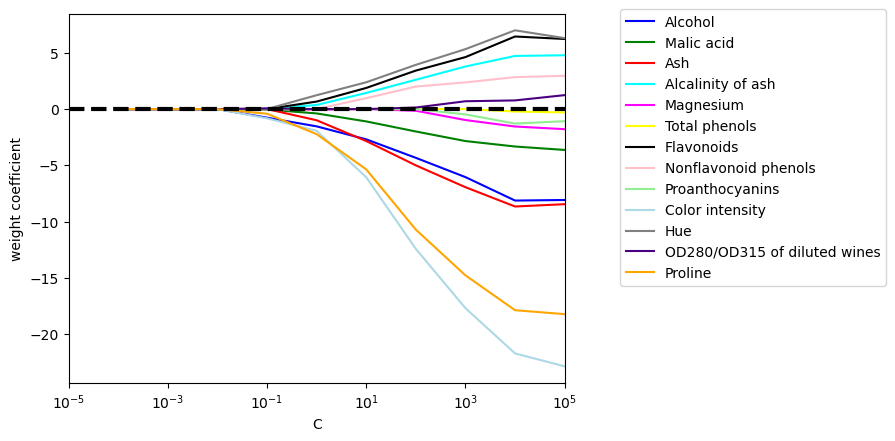

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
                'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',
                                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[: , column], label=df_wine.columns[column+1], color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)

plt.xlim([10**(-5), 10**5])

plt.ylabel('weight coefficient')
plt.xlabel('C')

plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)

In [34]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    """
    Sequential backward selection
    """
    
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        # 訓練データとテストデータに分割
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, 
                                         random_state=self.random_state)
            
        # 全ての特徴量の個数
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
            
        # 全ての特徴量を用いてスコアを算出
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
            
        while dim > self.k_features:
            scores = []       # Empty score list
            subsets = []     # Empty column index list
                
            # 特徴量の部分集合を表す列インデックスのリストを格納
            for p in combinations(self.indices_, r=dim - 1):
                    
                # スコアを計算して格納
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                    
                # 特徴量の部分集合を表す列インデックスのリストを格納
                subsets.append(p)
                    
            # 最良のスコアのインデックスを格納
            best = np.argmax(scores)
                
            # 最良のスコアとなる列インデックスを抽出して格納
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
                
            # 特徴量の部分集合を表す列インデックスのリストを格納
            subsets.append(p)
            
            # スコアを格納
            self.scores_.append(scores[best])
                
        # 最後に格納したスコア
        self.k_score_ = self.scores_[-1]
            
        return self
        
    def transform(self, X):
        return X[:, self.indices_]
        
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[: , indices], y_train)
        y_pred = self.estimator.predict(X_test[: , indices])
        score = self.scoring(y_test, y_pred)
        return score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# k近傍法のインスタンスを生成（近傍点数=5）
knn = KNeighborsClassifier(n_neighbors=5)

# SBS のインスタンス
sbs = SBS(knn, k_features=1)

# Execute SBS
sbs.fit(X_train_std, y_train)

In [ ]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
knn.fit(X_train_std, y_train)

print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test))

In [ ]:
knn.fit(X_train_std[: , k3], y_train)
print('Training accuracy: ', knn.score(X_train_std[: , k3], y_train))
print('Test accuracy: ', knn.score(X_test_std[: , k3], y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))
    plt.title('Feature Importances')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromMode1

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion: ', X_selected.shape[1])
for f inrange(X_selected.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))